# Classification- Bank Marketing

Bank Marketing csv
The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).

Data Set Information: The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

There are 21 columns and 41188 rows in this dataset. We have imported all the necessary files and libraries. We also filled the null values with mean and did the visualization using seaborn, pyplot, matplotlib.

Variables - age, job, marital, education, default, housing, loan, contact, month, day_of_week, duration, campaign, pdays , previous, poutcome, emp.var.rate, cons.price.idx, cons.conf.idx, euribor3m, nr.employed, y.

We will perform Classification on this dataset.

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Read csv file

In [2]:
bnk = pd.read_csv(r"bank_marketing.csv", sep = ';')

In [3]:
bnk

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


# Getting information about the dataset

In [4]:
bnk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

In [5]:
bnk.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [6]:
bnk.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [7]:
bnk.shape

(41188, 21)

# Getting information about the dataset

In [8]:
bnk.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

## Check for Duplicates and Null values

In [9]:
bnk.duplicated().sum()

12

In [10]:
duplicates = bnk[bnk.duplicated()]
print("Duplicate rows : ")
duplicates

Duplicate rows : 


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
1266,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
12261,36,retired,married,unknown,no,no,no,telephone,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
14234,27,technician,single,professional.course,no,no,no,cellular,jul,mon,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
16956,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,...,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
18465,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no
20216,55,services,married,high.school,unknown,no,no,cellular,aug,mon,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
20534,41,technician,married,professional.course,no,yes,no,cellular,aug,tue,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no
25217,39,admin.,married,university.degree,no,no,no,cellular,nov,tue,...,2,999,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,no
28477,24,services,single,high.school,no,yes,no,cellular,apr,tue,...,1,999,0,nonexistent,-1.8,93.075,-47.1,1.423,5099.1,no
32516,35,admin.,married,university.degree,no,yes,no,cellular,may,fri,...,4,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no


# Drop duplicates

In [11]:
bnk.drop_duplicates(keep=False, inplace=True)
bnk.duplicated().sum()

0

In [12]:
bnk.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

# Imputing 5%-10% null values

In [13]:
bnk['emp.var.rate'] = bnk['emp.var.rate'].mask(np.random.random(bnk['emp.var.rate'].shape) < .1)
bnk['duration'] = bnk['duration'].mask(np.random.random(bnk['duration'].shape) < .05)
bnk['campaign'] = bnk['campaign'].mask(np.random.random(bnk['campaign'].shape) < .1)
bnk['pdays'] = bnk['pdays'].mask(np.random.random(bnk['pdays'].shape) < .1)
bnk['previous'] = bnk['previous'].mask(np.random.random(bnk['previous'].shape) < .05)

In [14]:
bnk.isna().sum()

age                  0
job                  0
marital              0
education            0
default              0
housing              0
loan                 0
contact              0
month                0
day_of_week          0
duration          2013
campaign          4132
pdays             4169
previous          2043
poutcome             0
emp.var.rate      4133
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64

In [15]:
bnk.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41164 entries, 0 to 41187
Data columns (total 21 columns):
age               41164 non-null int64
job               41164 non-null object
marital           41164 non-null object
education         41164 non-null object
default           41164 non-null object
housing           41164 non-null object
loan              41164 non-null object
contact           41164 non-null object
month             41164 non-null object
day_of_week       41164 non-null object
duration          39151 non-null float64
campaign          37032 non-null float64
pdays             36995 non-null float64
previous          39121 non-null float64
poutcome          41164 non-null object
emp.var.rate      37031 non-null float64
cons.price.idx    41164 non-null float64
cons.conf.idx     41164 non-null float64
euribor3m         41164 non-null float64
nr.employed       41164 non-null float64
y                 41164 non-null object
dtypes: float64(9), int64(1), object(11)
me

# Replace null values with mean

In [16]:
bnk['emp.var.rate'].fillna(bnk['emp.var.rate'].mean(),inplace=True)
bnk['duration'].fillna(bnk['duration'].mean(),inplace=True)
bnk['campaign'].fillna(bnk['campaign'].mean(),inplace=True)
bnk['pdays'].fillna(bnk['pdays'].mean(),inplace=True)
bnk['previous'].fillna(bnk['previous'].mean(),inplace=True)

In [17]:
bnk.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41164 entries, 0 to 41187
Data columns (total 21 columns):
age               41164 non-null int64
job               41164 non-null object
marital           41164 non-null object
education         41164 non-null object
default           41164 non-null object
housing           41164 non-null object
loan              41164 non-null object
contact           41164 non-null object
month             41164 non-null object
day_of_week       41164 non-null object
duration          41164 non-null float64
campaign          41164 non-null float64
pdays             41164 non-null float64
previous          41164 non-null float64
poutcome          41164 non-null object
emp.var.rate      41164 non-null float64
cons.price.idx    41164 non-null float64
cons.conf.idx     41164 non-null float64
euribor3m         41164 non-null float64
nr.employed       41164 non-null float64
y                 41164 non-null object
dtypes: float64(9), int64(1), object(11)
me

# Exploratory Data Analysis

## Exploring numerical variables in 'bnk'

### Histogram Subplots

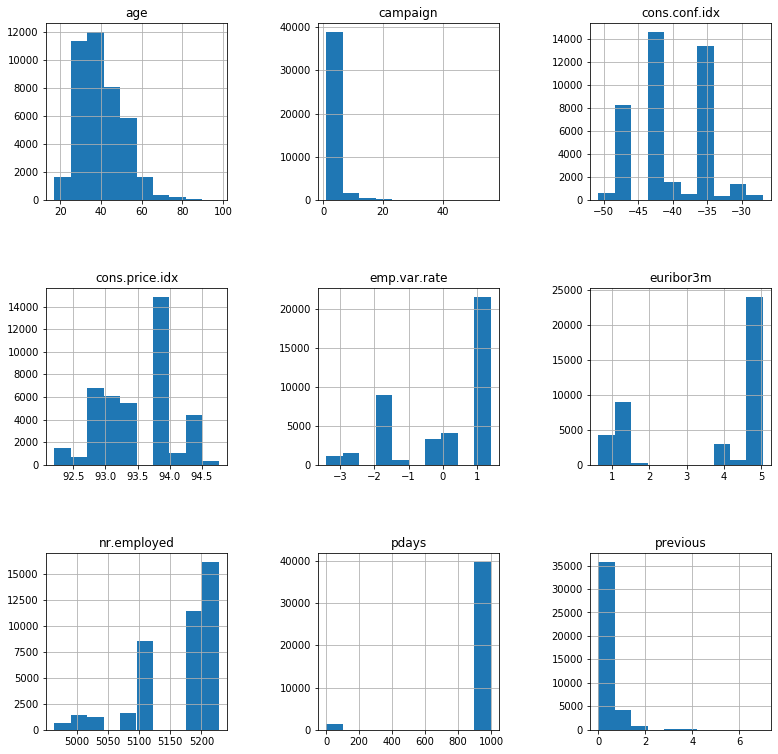

In [18]:
col = ['age','campaign','pdays','previous','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']
bnk.hist(column=col,figsize=(13,13))
plt.subplots_adjust(wspace = 0.5, hspace = 0.5)
plt.show()

### Distribution of age variable

Text(0.5, 1.0, 'Age Distribution')

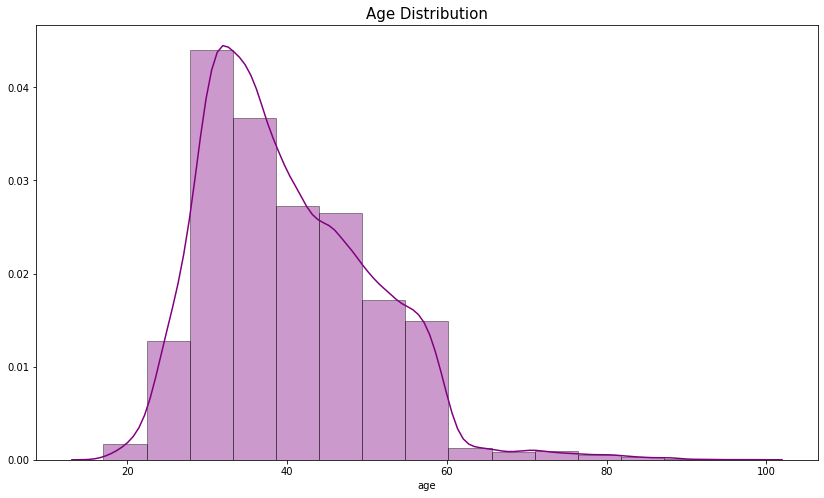

In [19]:
fig, bca = plt.subplots()
fig.set_size_inches(14, 8)
sns.distplot(bnk['age'], hist=True, kde=True, 
             bins=int(150/10), color = 'purple',
             hist_kws={'edgecolor':'black'})
bca.set_title('Age Distribution', fontsize=15)

### Count of Duration

Text(0.5, 1, 'Count of Duration')

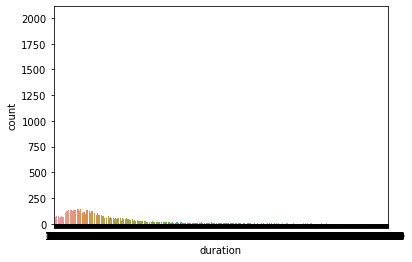

In [20]:
sns.countplot(x='duration',data=bnk)
bca.set_title('Count of Duration', fontsize=15)

### Count of cons.price.idx

Text(0.5, 1.0, 'Count of cons.price.idx')

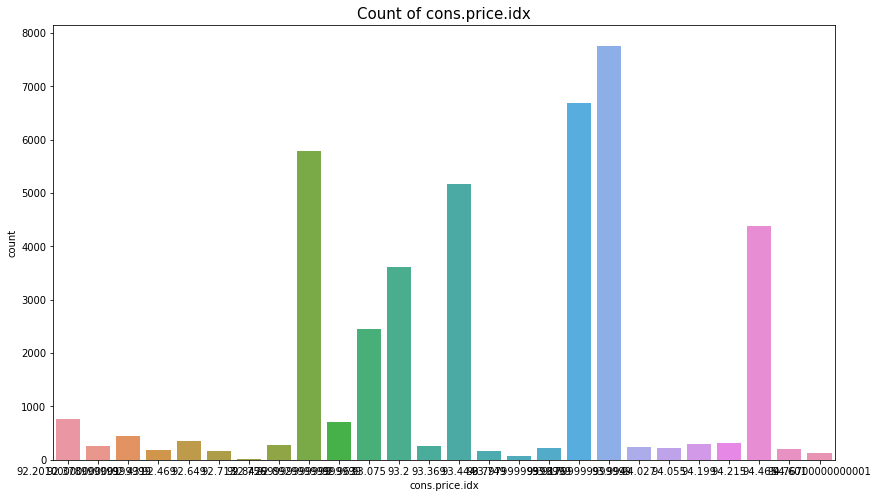

In [21]:
fig, bca = plt.subplots()
fig.set_size_inches(14, 8)
sns.countplot(x='cons.price.idx',data=bnk)
bca.set_title('Count of cons.price.idx', fontsize=15)

### Count of emp.var.rate

Text(0.5, 1.0, 'Count of emp.var.rate')

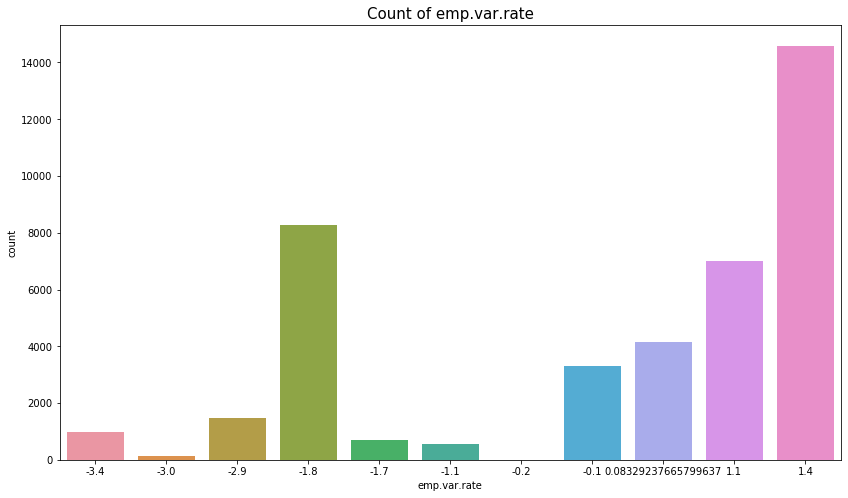

In [22]:
fig, bca = plt.subplots()
fig.set_size_inches(14, 8)
sns.countplot(x='emp.var.rate',data=bnk)
bca.set_title('Count of emp.var.rate', fontsize=15)

### Count of cons.conf.idx

Text(0.5, 1.0, 'Count of cons.conf.idx')

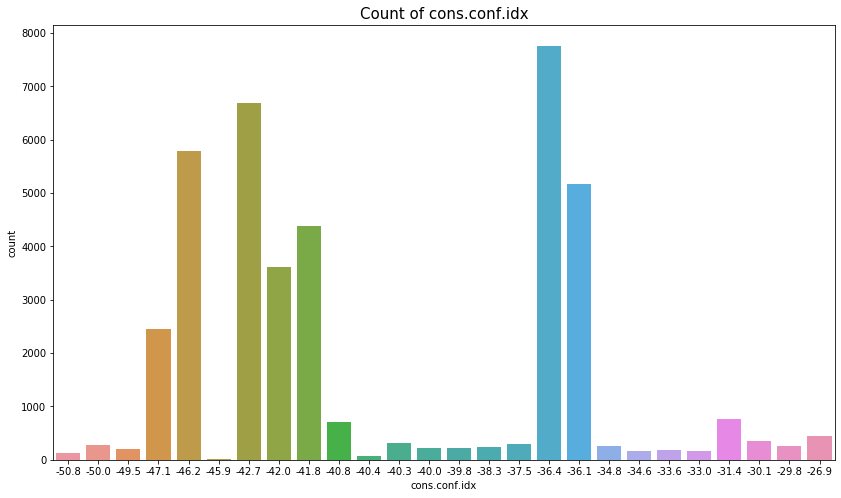

In [23]:
fig, bca = plt.subplots()
fig.set_size_inches(14, 8)
sns.countplot(x='cons.conf.idx',data=bnk)
bca.set_title('Count of cons.conf.idx', fontsize=15)

### Count of euribor3m

Text(0.5, 1.0, 'Count of euribor3m')

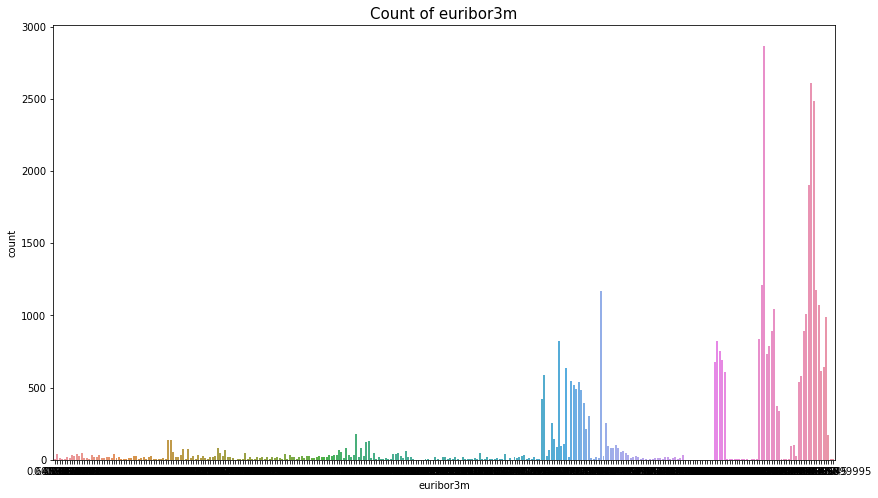

In [24]:
fig, bca = plt.subplots()
fig.set_size_inches(14, 8)
sns.countplot(x='euribor3m',data=bnk)
bca.set_title('Count of euribor3m', fontsize=15)

## Exploring variation of numerical variables w.r.t target variable y

### Variation in age

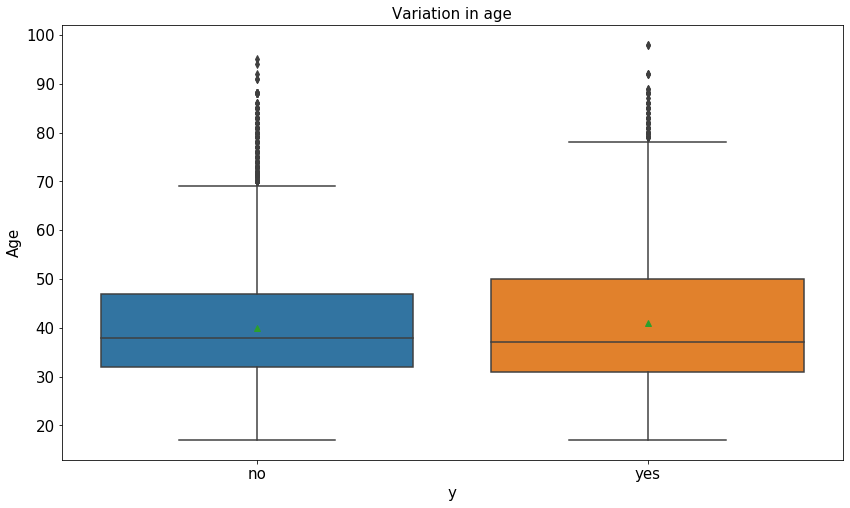

In [25]:
fig, bca = plt.subplots()
fig.set_size_inches(14, 8)
bca1 =sns.boxplot( x='y', y= 'age', data =bnk, showmeans=True)
bca1.set_xlabel('y', fontsize=15)
bca1.set_ylabel('Age', fontsize=15)
bca1.set_title('Variation in age', fontsize=15)
bca1.tick_params(labelsize=15)

### Variation in duration

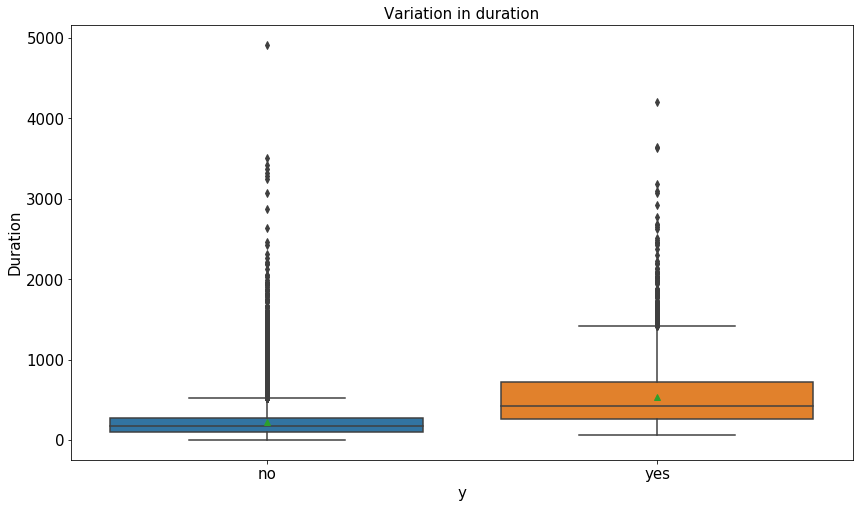

In [26]:
fig, bca = plt.subplots()
fig.set_size_inches(14, 8)
bca1 =sns.boxplot( x='y', y= 'duration', data =bnk, showmeans=True)
bca1.set_xlabel('y', fontsize=15)
bca1.set_ylabel('Duration', fontsize=15)
bca1.set_title('Variation in duration', fontsize=15)
bca1.tick_params(labelsize=15)

### Variation in Campaign

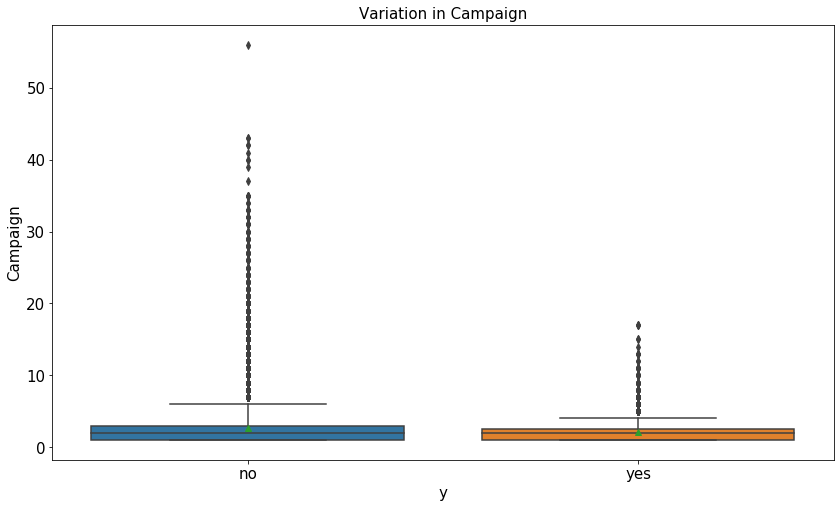

In [27]:
fig, bca = plt.subplots()
fig.set_size_inches(14, 8)
bca1 =sns.boxplot( x='y', y= 'campaign', data =bnk, showmeans=True)
bca1.set_xlabel('y', fontsize=15)
bca1.set_ylabel('Campaign', fontsize=15)
bca1.set_title('Variation in Campaign', fontsize=15)
bca1.tick_params(labelsize=15)

### Variation in Pdays

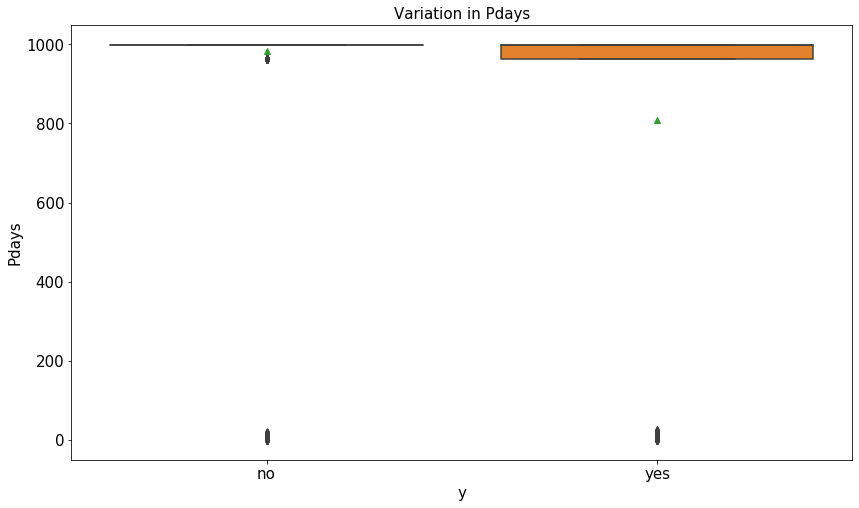

In [28]:
fig, bca = plt.subplots()
fig.set_size_inches(14, 8)
bca1 =sns.boxplot( x='y', y= 'pdays', data =bnk, showmeans=True)
bca1.set_xlabel('y', fontsize=15)
bca1.set_ylabel('Pdays', fontsize=15)
bca1.set_title('Variation in Pdays', fontsize=15)
bca1.tick_params(labelsize=15)

### Variation in Previous

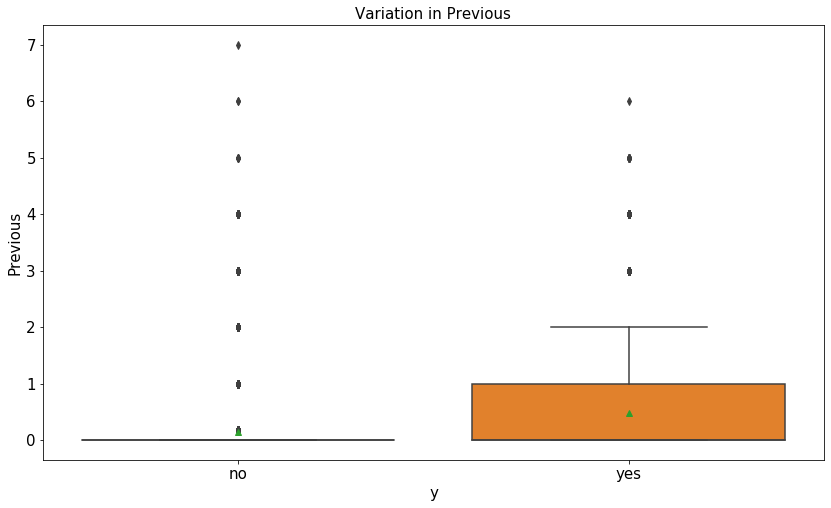

In [29]:
fig, bca = plt.subplots()
fig.set_size_inches(14, 8)
bca1 =sns.boxplot( x='y', y= 'previous', data =bnk, showmeans=True)
bca1.set_xlabel('y', fontsize=15)
bca1.set_ylabel('Previous', fontsize=15)
bca1.set_title('Variation in Previous', fontsize=15)
bca1.tick_params(labelsize=15)

### Variation in Emp.Var.Rate

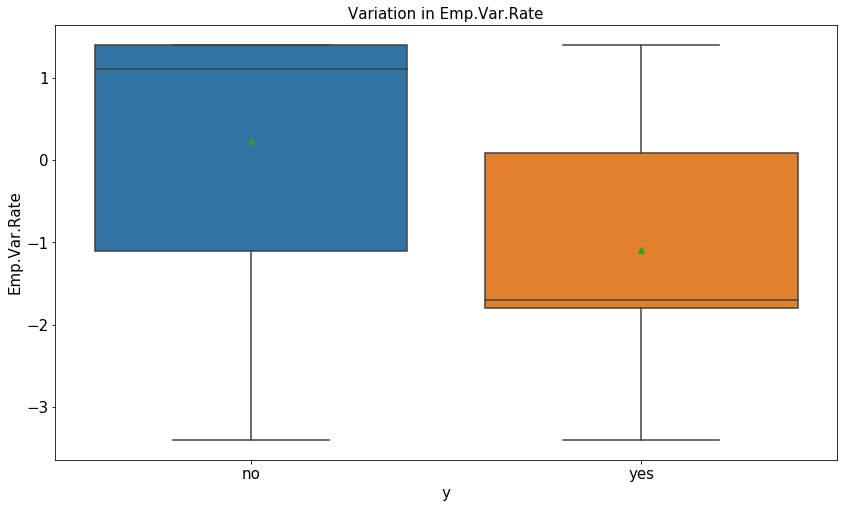

In [30]:
fig, bca = plt.subplots()
fig.set_size_inches(14, 8)
bca1 =sns.boxplot( x='y', y= 'emp.var.rate', data =bnk, showmeans=True)
bca1.set_xlabel('y', fontsize=15)
bca1.set_ylabel('Emp.Var.Rate', fontsize=15)
bca1.set_title('Variation in Emp.Var.Rate', fontsize=15)
bca1.tick_params(labelsize=15)

### Variation in Cons.Price.Idx

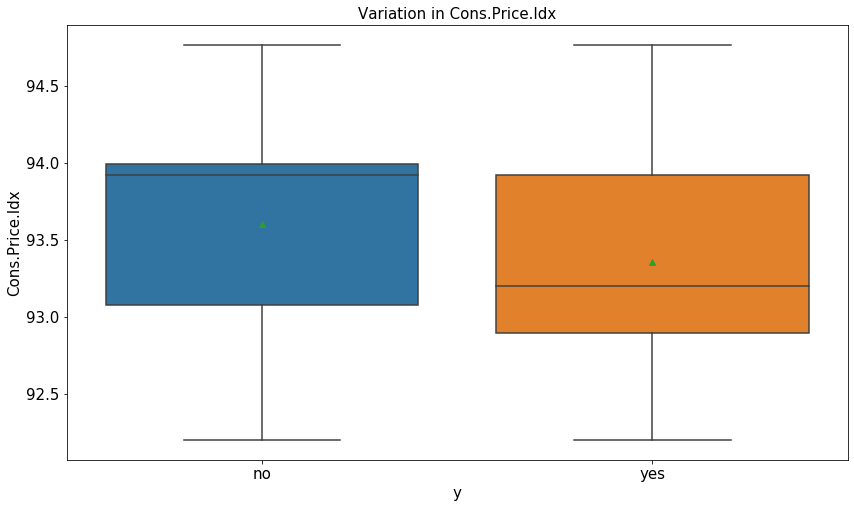

In [31]:
fig, bca = plt.subplots()
fig.set_size_inches(14, 8)
bca1 =sns.boxplot( x='y', y= 'cons.price.idx', data =bnk, showmeans=True)
bca1.set_xlabel('y', fontsize=15)
bca1.set_ylabel('Cons.Price.Idx', fontsize=15)
bca1.set_title('Variation in Cons.Price.Idx', fontsize=15)
bca1.tick_params(labelsize=15)

### Variation in Cons.Conf.Idx

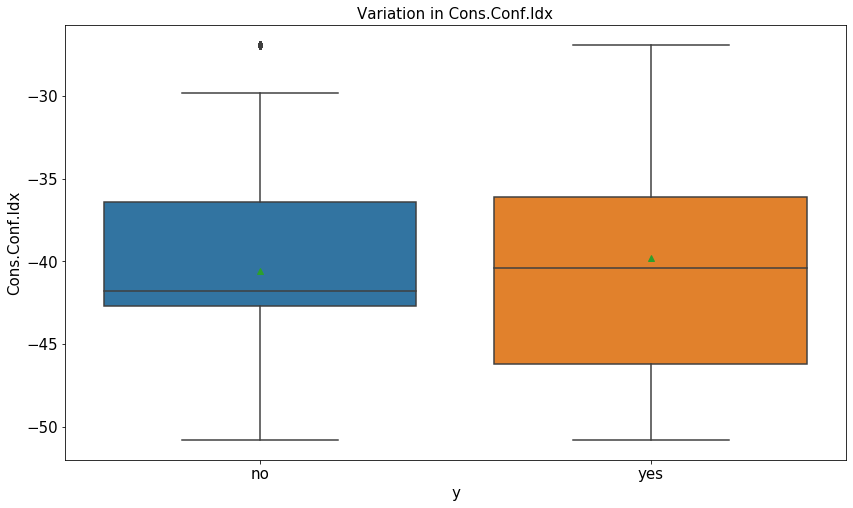

In [32]:
fig, bca = plt.subplots()
fig.set_size_inches(14, 8)
bca1 =sns.boxplot( x='y', y= 'cons.conf.idx', data =bnk, showmeans=True)
bca1.set_xlabel('y', fontsize=15)
bca1.set_ylabel('Cons.Conf.Idx', fontsize=15)
bca1.set_title('Variation in Cons.Conf.Idx', fontsize=15)
bca1.tick_params(labelsize=15)

### Variation in Euribor3m

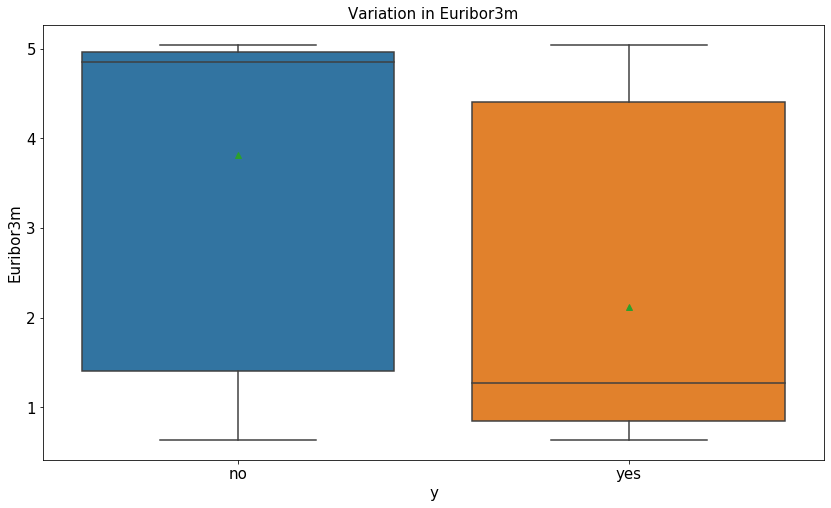

In [33]:
fig, bca = plt.subplots()
fig.set_size_inches(14, 8)
bca1 =sns.boxplot( x='y', y= 'euribor3m', data =bnk, showmeans=True)
bca1.set_xlabel('y', fontsize=15)
bca1.set_ylabel('Euribor3m', fontsize=15)
bca1.set_title('Variation in Euribor3m', fontsize=15)
bca1.tick_params(labelsize=15)

### Variation in Nr.Employed

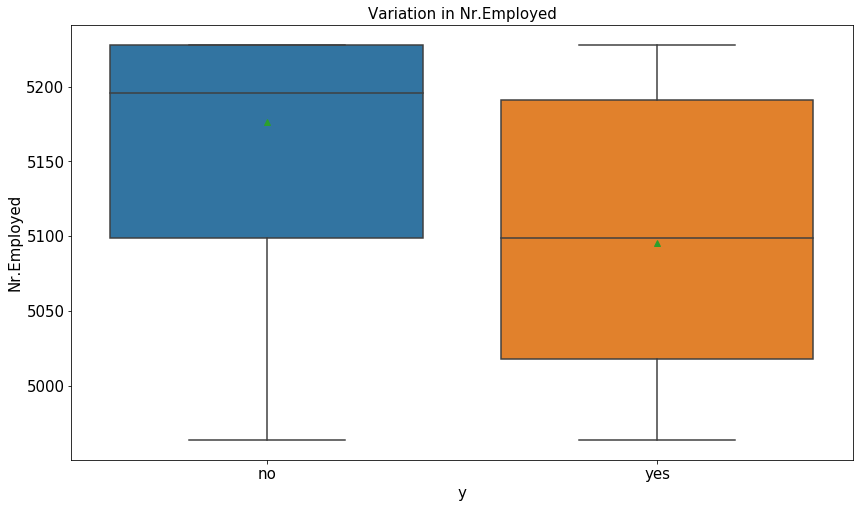

In [34]:
fig, bca = plt.subplots()
fig.set_size_inches(14, 8)
bca1 =sns.boxplot( x='y', y= 'nr.employed', data =bnk, showmeans=True)
bca1.set_xlabel('y', fontsize=15)
bca1.set_ylabel('Nr.Employed', fontsize=15)
bca1.set_title('Variation in Nr.Employed', fontsize=15)
bca1.tick_params(labelsize=15)

### Heatmap depicting correlation between all numerical variables

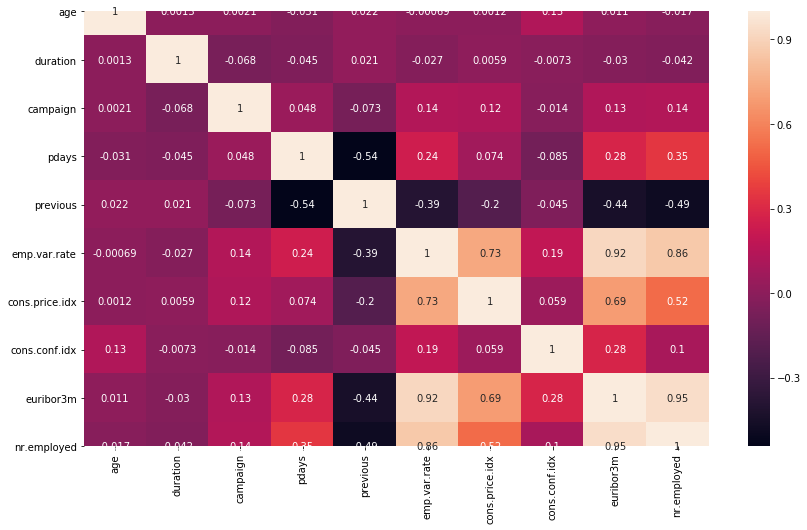

In [35]:
plt.subplots(figsize=(14,8))
sns.heatmap(bnk.corr(), annot=True)
plt.show()

## Encoding and storing target variable 'y'

#### We perform one-hot-encoding on target variable 'y' in bnk dataframe as it is categorical data. We store the result in a new variable 'y'.

In [36]:
y = pd.get_dummies(bnk['y'], columns = ['y'], prefix = ['y'], drop_first = True)
bnk.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1.00000,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,2.56651,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1.00000,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1.00000,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1.00000,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


## Creating a new dataframe 'bank_client'

#### We are creating the bank_client dataset to store information of bank clients. The attributes included are namely - age, job, marital, education, default, housing, loan

In [37]:
bank_client = bnk.iloc[: , 0:7]
bank_client.head()

,age,job,marital,education,default,housing,loan
0,56,housemaid,married,basic.4y,no,no,no
1,57,services,married,high.school,unknown,no,no
2,37,services,married,high.school,no,yes,no
3,40,admin.,married,basic.6y,no,no,no
4,56,services,married,high.school,no,no,yes


## Exploring variables in bank_client

### Age Count distribution

Text(0.5, 1.0, 'Age Count Distribution')

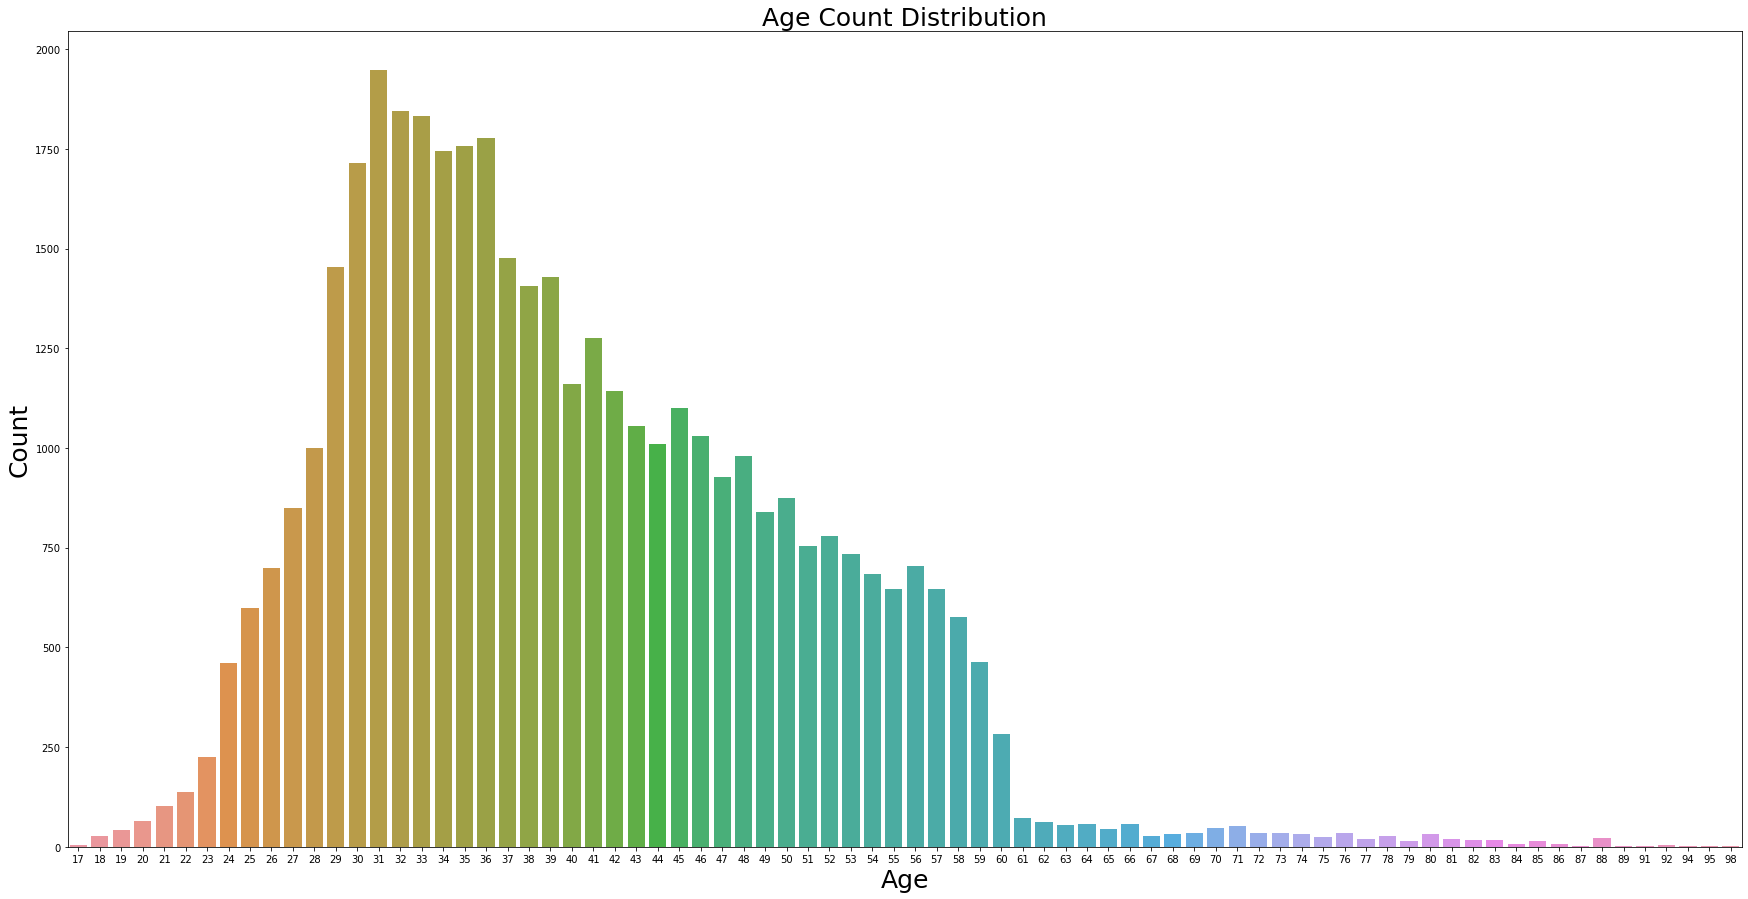

In [38]:
fig, bca = plt.subplots()
fig.set_size_inches(30, 15)
sns.countplot(x = 'age', data = bank_client)
bca.set_xlabel('Age', fontsize=25)
bca.set_ylabel('Count', fontsize=25)
bca.set_title('Age Count Distribution', fontsize=25)

### Age Distribution

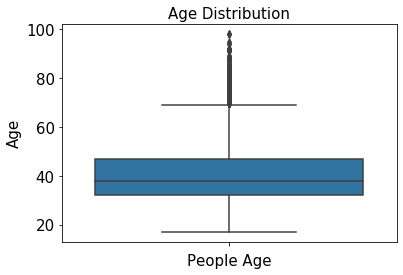

In [39]:
bca1 =sns.boxplot( y=bank_client["age"] )
bca1.set_xlabel('People Age', fontsize=15)
bca1.set_ylabel('Age', fontsize=15)
bca1.set_title('Age Distribution', fontsize=15)
bca1.tick_params(labelsize=15)

### Jobs Count Distribution

Text(0.5, 1.0, 'Jobs Count Distribution')

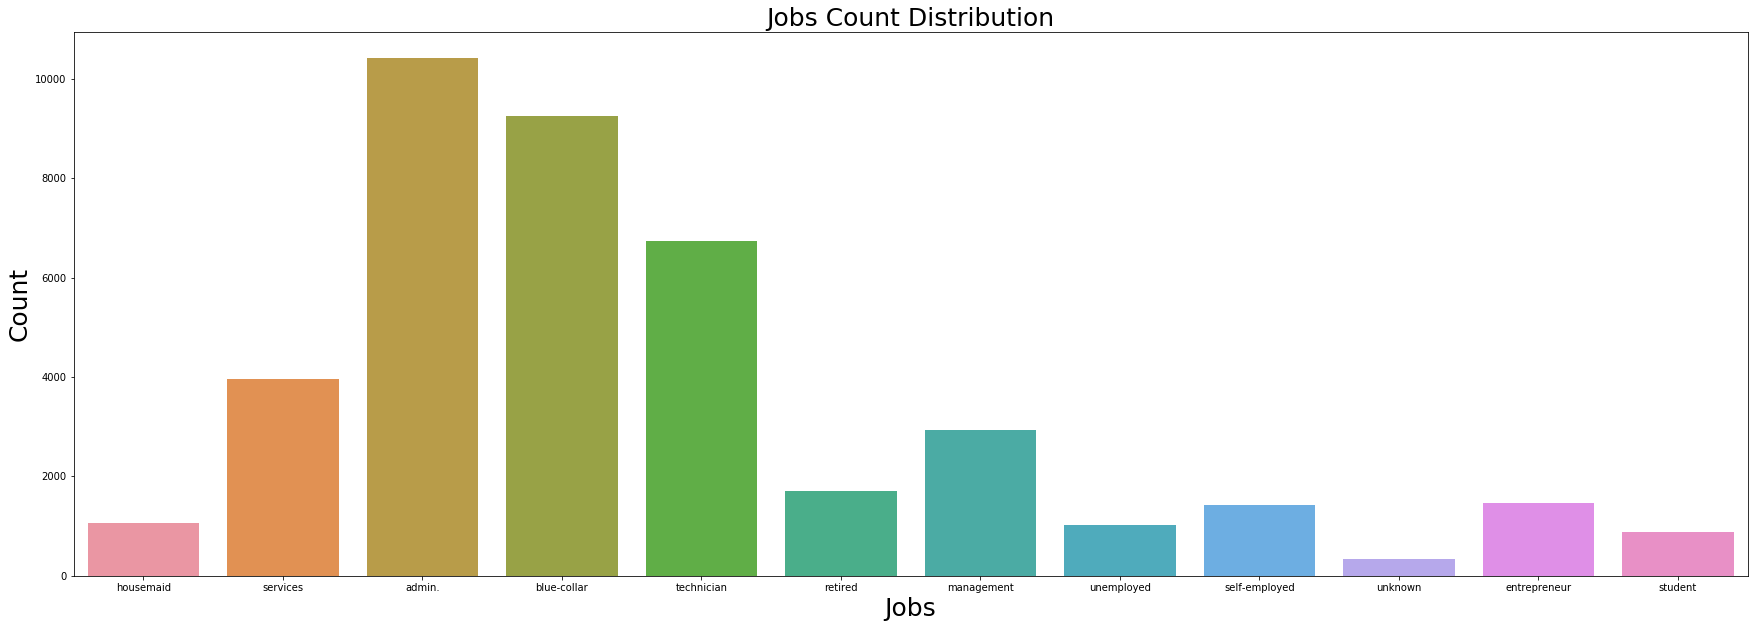

In [40]:
fig, bca = plt.subplots()
fig.set_size_inches(30, 10)
sns.countplot(x = 'job', data = bank_client)
bca.set_xlabel('Jobs', fontsize=25)
bca.set_ylabel('Count', fontsize=25)
bca.set_title('Jobs Count Distribution', fontsize=25)

### Marital Status Count Distribution

Text(0.5, 1.0, 'Marital Status Count Distribution')

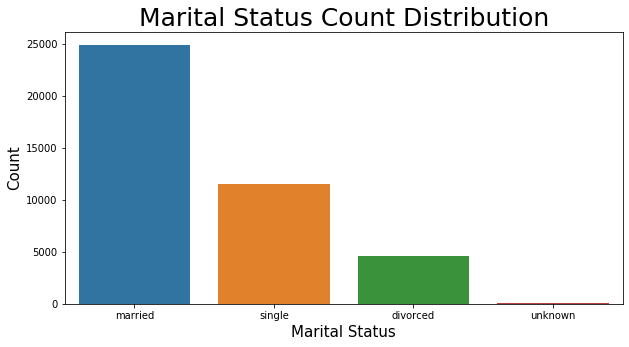

In [41]:
fig, bca = plt.subplots()
fig.set_size_inches(10, 5)
sns.countplot(x = 'marital', data = bank_client)
bca.set_xlabel('Marital Status', fontsize=15)
bca.set_ylabel('Count', fontsize=15)
bca.set_title('Marital Status Count Distribution', fontsize=25)

### Education Count Distribution

Text(0.5, 1.0, 'Education Count Distribution')

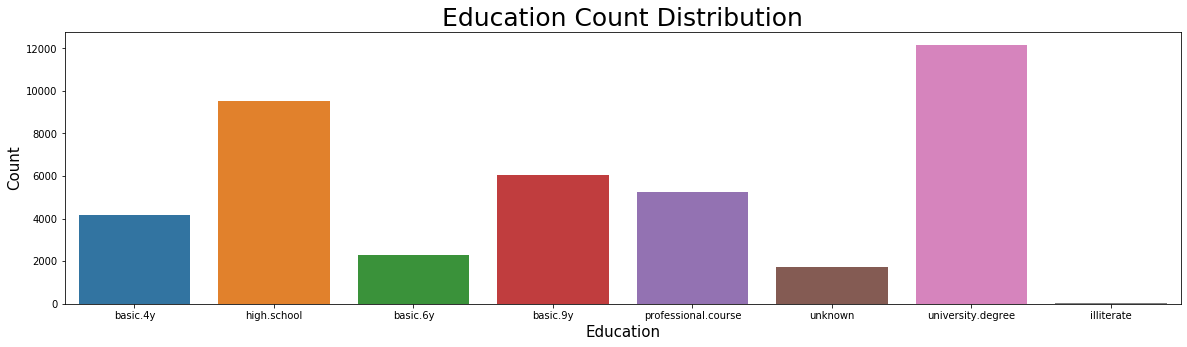

In [42]:
fig, bca = plt.subplots()
fig.set_size_inches(20, 5)
sns.countplot(x = 'education', data = bank_client)
bca.set_xlabel('Education', fontsize=15)
bca.set_ylabel('Count', fontsize=15)
bca.set_title('Education Count Distribution', fontsize=25)

### Housing Loan Count Distribution

Text(0.5, 1.0, 'Housing Loan Count Distribution')

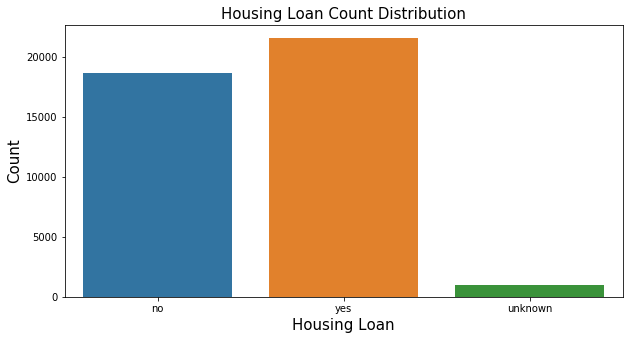

In [43]:
fig, bca = plt.subplots()
fig.set_size_inches(10, 5)
sns.countplot(x = 'housing', data = bank_client)
bca.set_xlabel('Housing Loan', fontsize=15)
bca.set_ylabel('Count', fontsize=15)
bca.set_title('Housing Loan Count Distribution', fontsize=15)

### Personal Loan Count Distribution

Text(0.5, 1.0, 'Personal Loan Count Distribution')

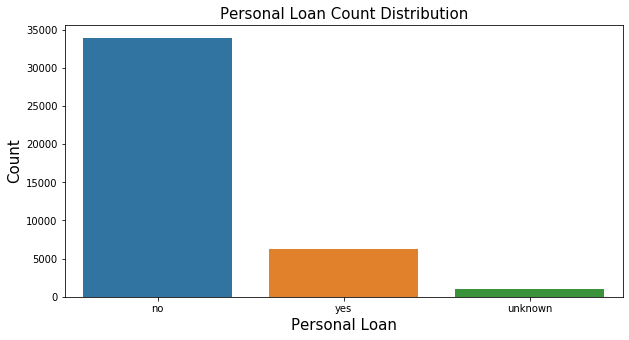

In [44]:
fig, bca = plt.subplots()
fig.set_size_inches(10, 5)
sns.countplot(x = 'loan', data = bank_client)
bca.set_xlabel('Personal Loan', fontsize=15)
bca.set_ylabel('Count', fontsize=15)
bca.set_title('Personal Loan Count Distribution', fontsize=15)

### Default Credit Count Distribution

Text(0.5, 1.0, 'Default Credit Count Distribution')

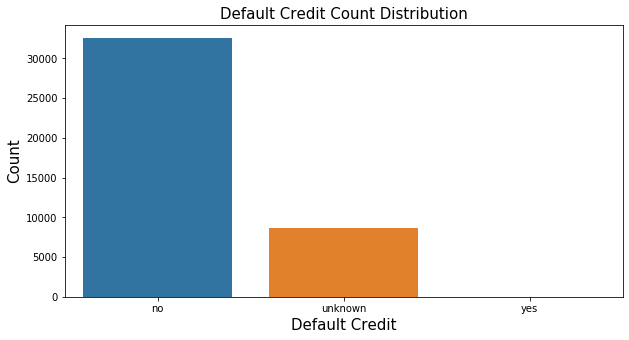

In [45]:
fig, bca = plt.subplots()
fig.set_size_inches(10, 5)
sns.countplot(x = 'default', data = bank_client)
bca.set_xlabel('Default Credit', fontsize=15)
bca.set_ylabel('Count', fontsize=15)
bca.set_title('Default Credit Count Distribution', fontsize=15)

## Treating categorical variables

In [46]:
bank_client['job'].unique()


array(['housemaid', 'services', 'admin.', 'blue-collar', 'technician',
       'retired', 'management', 'unemployed', 'self-employed', 'unknown',
       'entrepreneur', 'student'], dtype=object)

In [47]:
dummy = pd.get_dummies(bank_client['job'],prefix = 'Job_N')
print(dummy)

       Job_N_admin.  Job_N_blue-collar  Job_N_entrepreneur  Job_N_housemaid  \
0                 0                  0                   0                1   
1                 0                  0                   0                0   
2                 0                  0                   0                0   
3                 1                  0                   0                0   
4                 0                  0                   0                0   
...             ...                ...                 ...              ...   
41183             0                  0                   0                0   
41184             0                  1                   0                0   
41185             0                  0                   0                0   
41186             0                  0                   0                0   
41187             0                  0                   0                0   

       Job_N_management  Job_N_retired  Job_N_self-

In [48]:
bank_client = bank_client.join(dummy)
bank_client

,age,job,marital,education,default,housing,loan,Job_N_admin.,Job_N_blue-collar,Job_N_entrepreneur,Job_N_housemaid,Job_N_management,Job_N_retired,Job_N_self-employed,Job_N_services,Job_N_student,Job_N_technician,Job_N_unemployed,Job_N_unknown
0,56,housemaid,married,basic.4y,no,no,no,0,0,0,1,0,0,0,0,0,0,0,0
1,57,services,married,high.school,unknown,no,no,0,0,0,0,0,0,0,1,0,0,0,0
2,37,services,married,high.school,no,yes,no,0,0,0,0,0,0,0,1,0,0,0,0
3,40,admin.,married,basic.6y,no,no,no,1,0,0,0,0,0,0,0,0,0,0,0
4,56,services,married,high.school,no,no,yes,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,0,0,0,0,0,1,0,0,0,0,0,0
41184,46,blue-collar,married,professional.course,no,no,no,0,1,0,0,0,0,0,0,0,0,0,0
41185,56,retired,married,university.degree,no,yes,no,0,0,0,0,0,1,0,0,0,0,0,0
41186,44,technician,married,professional.course,no,no,no,0,0,0,0,0,0,0,0,0,1,0,0


In [49]:
bank_client['marital'].unique()

array(['married', 'single', 'divorced', 'unknown'], dtype=object)

In [50]:
lc=LabelEncoder()
bank_client['Marital_N']=lc.fit_transform(bank_client['marital'])
bank_client

,age,job,marital,education,default,housing,loan,Job_N_admin.,Job_N_blue-collar,Job_N_entrepreneur,Job_N_housemaid,Job_N_management,Job_N_retired,Job_N_self-employed,Job_N_services,Job_N_student,Job_N_technician,Job_N_unemployed,Job_N_unknown,Marital_N
0,56,housemaid,married,basic.4y,no,no,no,0,0,0,1,0,0,0,0,0,0,0,0,1
1,57,services,married,high.school,unknown,no,no,0,0,0,0,0,0,0,1,0,0,0,0,1
2,37,services,married,high.school,no,yes,no,0,0,0,0,0,0,0,1,0,0,0,0,1
3,40,admin.,married,basic.6y,no,no,no,1,0,0,0,0,0,0,0,0,0,0,0,1
4,56,services,married,high.school,no,no,yes,0,0,0,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,0,0,0,0,0,1,0,0,0,0,0,0,1
41184,46,blue-collar,married,professional.course,no,no,no,0,1,0,0,0,0,0,0,0,0,0,0,1
41185,56,retired,married,university.degree,no,yes,no,0,0,0,0,0,1,0,0,0,0,0,0,1
41186,44,technician,married,professional.course,no,no,no,0,0,0,0,0,0,0,0,0,1,0,0,1


In [51]:
bank_client['education'].unique()

array(['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
       'professional.course', 'unknown', 'university.degree',
       'illiterate'], dtype=object)

In [52]:
bank_client=pd.concat((bank_client,pd.get_dummies(bank_client['education'])),axis=1)

In [53]:
bank_client['default'].unique()

array(['no', 'unknown', 'yes'], dtype=object)

In [54]:
bank_client['housing'].unique()

array(['no', 'yes', 'unknown'], dtype=object)

In [55]:
bank_client['loan'].unique()

array(['no', 'yes', 'unknown'], dtype=object)

In [56]:
lc=LabelEncoder()
bank_client['Default_N']=lc.fit_transform(bank_client['default'])

In [57]:
lc=LabelEncoder()
bank_client['Housing_N']=lc.fit_transform(bank_client['housing'])

In [58]:
lc=LabelEncoder()
bank_client['Loan_N']=lc.fit_transform(bank_client['loan'])

In [59]:
bank_client.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41164 entries, 0 to 41187
Data columns (total 31 columns):
age                    41164 non-null int64
job                    41164 non-null object
marital                41164 non-null object
education              41164 non-null object
default                41164 non-null object
housing                41164 non-null object
loan                   41164 non-null object
Job_N_admin.           41164 non-null uint8
Job_N_blue-collar      41164 non-null uint8
Job_N_entrepreneur     41164 non-null uint8
Job_N_housemaid        41164 non-null uint8
Job_N_management       41164 non-null uint8
Job_N_retired          41164 non-null uint8
Job_N_self-employed    41164 non-null uint8
Job_N_services         41164 non-null uint8
Job_N_student          41164 non-null uint8
Job_N_technician       41164 non-null uint8
Job_N_unemployed       41164 non-null uint8
Job_N_unknown          41164 non-null uint8
Marital_N              41164 non-null int32
basic

In [60]:
bank_client = bank_client.drop(['job', 'marital', 'education', 'housing', 'default', 'loan'], axis = 1)

In [61]:
bank_client.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41164 entries, 0 to 41187
Data columns (total 25 columns):
age                    41164 non-null int64
Job_N_admin.           41164 non-null uint8
Job_N_blue-collar      41164 non-null uint8
Job_N_entrepreneur     41164 non-null uint8
Job_N_housemaid        41164 non-null uint8
Job_N_management       41164 non-null uint8
Job_N_retired          41164 non-null uint8
Job_N_self-employed    41164 non-null uint8
Job_N_services         41164 non-null uint8
Job_N_student          41164 non-null uint8
Job_N_technician       41164 non-null uint8
Job_N_unemployed       41164 non-null uint8
Job_N_unknown          41164 non-null uint8
Marital_N              41164 non-null int32
basic.4y               41164 non-null uint8
basic.6y               41164 non-null uint8
basic.9y               41164 non-null uint8
high.school            41164 non-null uint8
illiterate             41164 non-null uint8
professional.course    41164 non-null uint8
university.

In [62]:
bank_client['age'] = bank_client['age'].astype(int)


In [63]:
bank_client.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41164 entries, 0 to 41187
Data columns (total 25 columns):
age                    41164 non-null int32
Job_N_admin.           41164 non-null uint8
Job_N_blue-collar      41164 non-null uint8
Job_N_entrepreneur     41164 non-null uint8
Job_N_housemaid        41164 non-null uint8
Job_N_management       41164 non-null uint8
Job_N_retired          41164 non-null uint8
Job_N_self-employed    41164 non-null uint8
Job_N_services         41164 non-null uint8
Job_N_student          41164 non-null uint8
Job_N_technician       41164 non-null uint8
Job_N_unemployed       41164 non-null uint8
Job_N_unknown          41164 non-null uint8
Marital_N              41164 non-null int32
basic.4y               41164 non-null uint8
basic.6y               41164 non-null uint8
basic.9y               41164 non-null uint8
high.school            41164 non-null uint8
illiterate             41164 non-null uint8
professional.course    41164 non-null uint8
university.

In [64]:
def age(dataframe):
    dataframe.loc[dataframe['age'] <= 32, 'age'] = 1
    dataframe.loc[(dataframe['age'] > 32) & (dataframe['age'] <= 47), 'age'] = 2
    dataframe.loc[(dataframe['age'] > 47) & (dataframe['age'] <= 70), 'age'] = 3
    dataframe.loc[(dataframe['age'] > 70) & (dataframe['age'] <= 98), 'age'] = 4
           
    return dataframe

age(bank_client) ;

In [65]:
bank_client.head()

,age,Job_N_admin.,Job_N_blue-collar,Job_N_entrepreneur,Job_N_housemaid,Job_N_management,Job_N_retired,Job_N_self-employed,Job_N_services,Job_N_student,...,basic.6y,basic.9y,high.school,illiterate,professional.course,university.degree,unknown,Default_N,Housing_N,Loan_N
0,3,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,1,0,0
2,2,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,2,0
3,2,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,3,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,2


### Correlation between variables in bank_client dataset

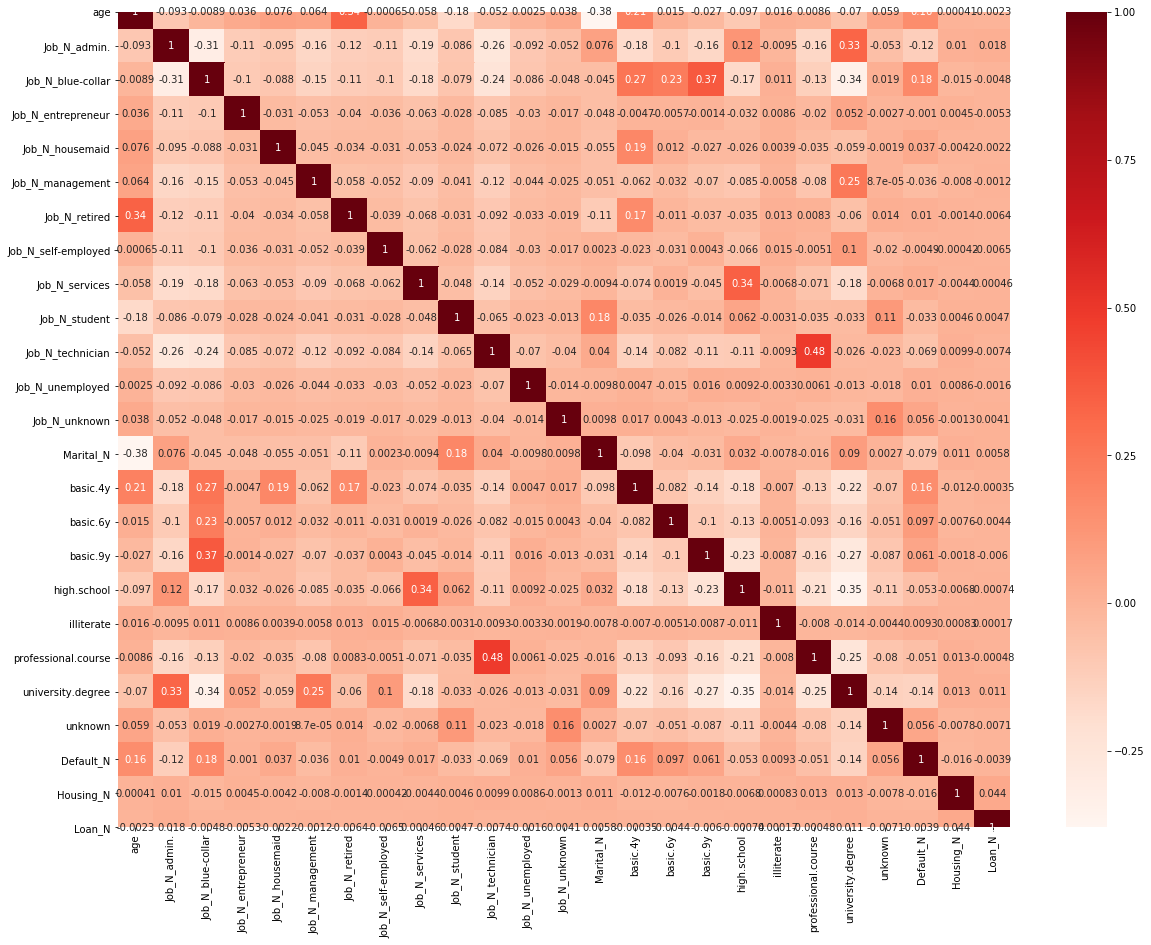

In [66]:
plt.figure(figsize=(20,15))
cor = bank_client.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

## Creating new dataset 'other_attr'

#### We are now creating a dataset to store the attributes - contact, month, day_of_week and duration.

In [67]:
other_attr = bnk.iloc[: , 7:11]
other_attr.head()

,contact,month,day_of_week,duration
0,telephone,may,mon,261.000000
1,telephone,may,mon,149.000000
2,telephone,may,mon,258.527087
3,telephone,may,mon,151.000000
4,telephone,may,mon,307.000000


## Check for null values

In [68]:
other_attr.isnull().sum()

contact        0
month          0
day_of_week    0
duration       0
dtype: int64

## Exploring the attributes in 'other_attr'

### Calls duration

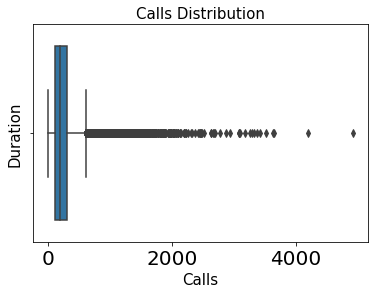

In [69]:
dur = sns.boxplot(x = 'duration', data = other_attr)
dur.set_xlabel('Calls', fontsize=15)
dur.set_ylabel('Duration', fontsize=15)
dur.set_title('Calls Distribution', fontsize=15)
dur.tick_params(labelsize=20)

### Contacts Count

Text(0.5, 1.0, 'Contacts Count')

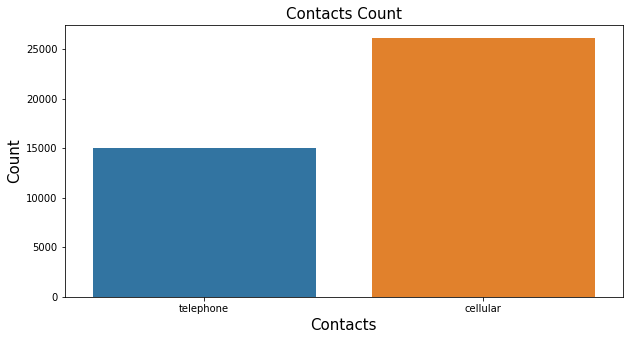

In [70]:
fig, bca = plt.subplots()
fig.set_size_inches(10, 5)
sns.countplot(x = 'contact', data = other_attr)
bca.set_xlabel('Contacts', fontsize=15)
bca.set_ylabel('Count', fontsize=15)
bca.set_title('Contacts Count', fontsize=15)

### Months Count

Text(0.5, 1.0, 'Months Count')

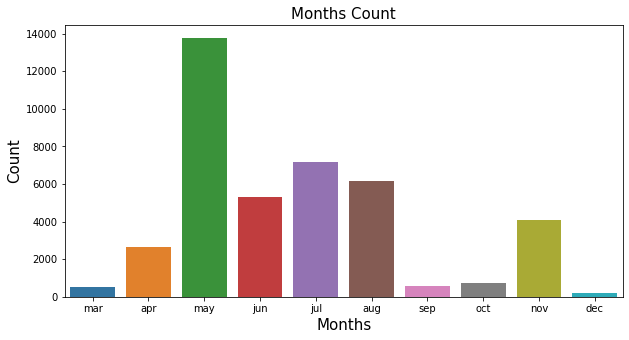

In [71]:
fig, bca = plt.subplots()
fig.set_size_inches(10, 5)
sns.countplot(x = 'month', data = other_attr, order = ['mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'])
bca.set_xlabel('Months', fontsize=15)
bca.set_ylabel('Count', fontsize=15)
bca.set_title('Months Count', fontsize=15)

### Days Of Week Count

Text(0.5, 1.0, 'DaysOfWeek Count')

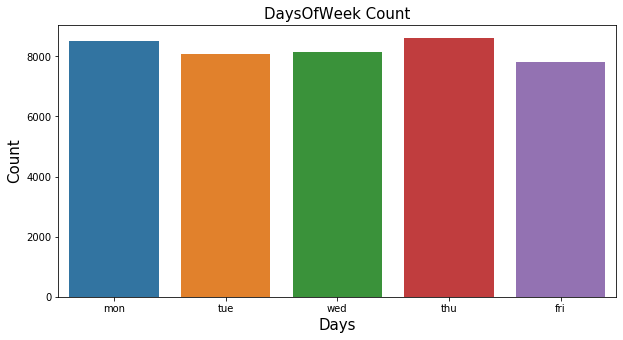

In [72]:
fig, bca = plt.subplots()
fig.set_size_inches(10, 5)
sns.countplot(x = 'day_of_week', data = other_attr)
bca.set_xlabel('Days', fontsize=15)
bca.set_ylabel('Count', fontsize=15)
bca.set_title('DaysOfWeek Count', fontsize=15)

### Treating categorical variables

In [73]:
other_attr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41164 entries, 0 to 41187
Data columns (total 4 columns):
contact        41164 non-null object
month          41164 non-null object
day_of_week    41164 non-null object
duration       41164 non-null float64
dtypes: float64(1), object(3)
memory usage: 2.8+ MB


In [74]:
other_attr['contact'].unique()

array(['telephone', 'cellular'], dtype=object)

In [75]:
other_attr['contact'] = other_attr['contact'].map({'telephone':1, 'cellular':2}).astype(int)

In [76]:
other_attr['month'].unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'mar', 'apr',
       'sep'], dtype=object)

In [77]:
other_attr["month"] = other_attr["month"].str.capitalize()

In [78]:
other_attr["month"] = pd.to_datetime(other_attr.month, format='%b', errors='coerce').dt.month
other_attr = other_attr.sort_values(by="month")

In [79]:
other_attr['month'].unique()

array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

In [80]:
other_attr['day_of_week'].unique()

array(['tue', 'mon', 'thu', 'wed', 'fri'], dtype=object)

In [81]:
lc=LabelEncoder()
other_attr['day_of_week']=lc.fit_transform(other_attr['day_of_week'])

In [82]:
other_attr['day_of_week'].unique()

array([3, 1, 2, 4, 0], dtype=int64)

In [83]:
other_attr['duration'] = other_attr['duration'].astype(int)

## Creating new dataset 'cont_attr'

#### Here we are creating a new dataset for the social and economic context attributes, which are - emp.var.rate, cons.price.idx, cons.conf.idx, euribor3m, nr.employed.

In [84]:
cont_attr= bnk.loc[: , ['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']]
cont_attr.head()

,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,1.1,93.994,-36.4,4.857,5191.0
1,1.1,93.994,-36.4,4.857,5191.0
2,1.1,93.994,-36.4,4.857,5191.0
3,1.1,93.994,-36.4,4.857,5191.0
4,1.1,93.994,-36.4,4.857,5191.0


## Creating a dataset 'remain_attr'

#### This dataset contains all the remaining attributes ( y excluded). These are - campaign, pdays, previous, poutcome

In [85]:
remain_attr = bnk.loc[: , ['campaign', 'pdays','previous', 'poutcome']]
remain_attr.head()

,campaign,pdays,previous,poutcome
0,1.00000,999.0,0.0,nonexistent
1,2.56651,999.0,0.0,nonexistent
2,1.00000,999.0,0.0,nonexistent
3,1.00000,999.0,0.0,nonexistent
4,1.00000,999.0,0.0,nonexistent


### Treating the categorical attributes

In [86]:
remain_attr['poutcome'].unique()

array(['nonexistent', 'failure', 'success'], dtype=object)

In [87]:
remain_attr['poutcome'] = remain_attr['poutcome'].map({'nonexistent':1, 'failure':2, 'success':3}).astype(int)

## Creating the 'final_bank' dataset

#### We will now merge/concat all the above datasets that we created and curated as per need into one final dataset for our analysis.

In [88]:
final_bank= pd.concat([bank_client, other_attr, cont_attr, remain_attr], axis = 1)


### Exploring the dataset

In [89]:
final_bank.shape

(41164, 38)

In [90]:
final_bank.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41164 entries, 0 to 41187
Data columns (total 38 columns):
age                    41164 non-null int32
Job_N_admin.           41164 non-null uint8
Job_N_blue-collar      41164 non-null uint8
Job_N_entrepreneur     41164 non-null uint8
Job_N_housemaid        41164 non-null uint8
Job_N_management       41164 non-null uint8
Job_N_retired          41164 non-null uint8
Job_N_self-employed    41164 non-null uint8
Job_N_services         41164 non-null uint8
Job_N_student          41164 non-null uint8
Job_N_technician       41164 non-null uint8
Job_N_unemployed       41164 non-null uint8
Job_N_unknown          41164 non-null uint8
Marital_N              41164 non-null int32
basic.4y               41164 non-null uint8
basic.6y               41164 non-null uint8
basic.9y               41164 non-null uint8
high.school            41164 non-null uint8
illiterate             41164 non-null uint8
professional.course    41164 non-null uint8
university.

In [91]:
final_bank.isna().sum()

age                    0
Job_N_admin.           0
Job_N_blue-collar      0
Job_N_entrepreneur     0
Job_N_housemaid        0
Job_N_management       0
Job_N_retired          0
Job_N_self-employed    0
Job_N_services         0
Job_N_student          0
Job_N_technician       0
Job_N_unemployed       0
Job_N_unknown          0
Marital_N              0
basic.4y               0
basic.6y               0
basic.9y               0
high.school            0
illiterate             0
professional.course    0
university.degree      0
unknown                0
Default_N              0
Housing_N              0
Loan_N                 0
contact                0
month                  0
day_of_week            0
duration               0
emp.var.rate           0
cons.price.idx         0
cons.conf.idx          0
euribor3m              0
nr.employed            0
campaign               0
pdays                  0
previous               0
poutcome               0
dtype: int64

In [92]:
final_bank['campaign'].unique()

array([ 1.        ,  2.56651005,  2.        ,  3.        ,  4.        ,
        5.        ,  6.        ,  8.        ,  7.        ,  9.        ,
       10.        , 11.        , 13.        , 19.        , 12.        ,
       18.        , 14.        , 22.        , 25.        , 16.        ,
       17.        , 23.        , 15.        , 20.        , 56.        ,
       39.        , 35.        , 42.        , 28.        , 26.        ,
       27.        , 32.        , 21.        , 24.        , 29.        ,
       31.        , 30.        , 41.        , 37.        , 40.        ,
       33.        , 34.        , 43.        ])

In [93]:
final_bank['campaign'].fillna(final_bank['campaign'].mean(),inplace=True)

In [94]:
final_bank.isna().sum()

age                    0
Job_N_admin.           0
Job_N_blue-collar      0
Job_N_entrepreneur     0
Job_N_housemaid        0
Job_N_management       0
Job_N_retired          0
Job_N_self-employed    0
Job_N_services         0
Job_N_student          0
Job_N_technician       0
Job_N_unemployed       0
Job_N_unknown          0
Marital_N              0
basic.4y               0
basic.6y               0
basic.9y               0
high.school            0
illiterate             0
professional.course    0
university.degree      0
unknown                0
Default_N              0
Housing_N              0
Loan_N                 0
contact                0
month                  0
day_of_week            0
duration               0
emp.var.rate           0
cons.price.idx         0
cons.conf.idx          0
euribor3m              0
nr.employed            0
campaign               0
pdays                  0
previous               0
poutcome               0
dtype: int64

In [95]:
final_bank.describe()

,age,Job_N_admin.,Job_N_blue-collar,Job_N_entrepreneur,Job_N_housemaid,Job_N_management,Job_N_retired,Job_N_self-employed,Job_N_services,Job_N_student,...,duration,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,campaign,pdays,previous,poutcome
count,41164.000000,41164.000000,41164.000000,41164.000000,41164.000000,41164.000000,41164.000000,41164.000000,41164.000000,41164.000000,...,41164.000000,41164.000000,41164.000000,41164.000000,41164.000000,41164.000000,41164.00000,41164.000000,41164.000000,41164.000000
mean,1.978598,0.253037,0.224759,0.035371,0.025751,0.071033,0.041687,0.034520,0.096322,0.021256,...,258.501312,0.083292,93.575775,-40.503127,3.621296,5167.033828,2.56651,962.494256,0.171954,1.170003
std,0.735708,0.434757,0.417429,0.184717,0.158392,0.256883,0.199875,0.182564,0.295036,0.144240,...,253.122804,1.489278,0.578838,4.627522,1.734427,72.251200,2.63945,177.154147,0.479957,0.455868
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,1.00000,0.000000,0.000000,1.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,106.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,1.00000,999.000000,0.000000,1.000000
50%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,190.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,2.00000,999.000000,0.000000,1.000000
75%,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,308.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,3.00000,999.000000,0.000000,1.000000
max,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,4918.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,56.00000,999.000000,7.000000,3.000000


## Splitting the data

#### We already have our target variable stored in 'y' from the beginning. Also, we have seperately curated our final_bank dataset. So, it does not contain our target variable y from our original dataset.

In [96]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(final_bank,y, test_size = 0.2, random_state = 0)

In [97]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

In [98]:
X_train.head()

,age,Job_N_admin.,Job_N_blue-collar,Job_N_entrepreneur,Job_N_housemaid,Job_N_management,Job_N_retired,Job_N_self-employed,Job_N_services,Job_N_student,...,duration,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,campaign,pdays,previous,poutcome
20018,2,0,0,0,0,0,0,0,0,0,...,314,1.400000,93.444,-36.1,4.966,5228.1,3.0,999.0,0.0,1
39695,1,1,0,0,0,0,0,0,0,0,...,30,-1.800000,93.876,-40.0,0.690,5008.7,1.0,999.0,0.0,1
17238,3,0,0,0,1,0,0,0,0,0,...,258,0.083292,93.918,-42.7,4.962,5228.1,9.0,999.0,0.0,1
5924,3,0,1,0,0,0,0,0,0,0,...,67,1.100000,93.994,-36.4,4.857,5191.0,3.0,999.0,0.0,1
34656,2,1,0,0,0,0,0,0,0,0,...,213,-1.800000,92.893,-46.2,1.266,5099.1,1.0,999.0,0.0,1


## Scaling the data

#### In our final_bank data, we can see that the minimum and maimum value ranges from quite high to quite low values. For this reason, we are scaling our data with StandardScaler. We do so to scale our features centred around the zero and have unit variance.

In [99]:
#train-test split
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

## Voting Classifier

In [100]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn.ensemble import VotingClassifier

### Hard voting 

In [101]:
log_reg_clf = LogisticRegression(random_state= 0, C = 100, max_iter = 1000)
log_reg_clf.fit(X_train, y_train)

dtree_clf = DecisionTreeClassifier(max_depth = 1, random_state = 0)
dtree_clf.fit(X_train, y_train)

svc_clf = SVC(C = 0.1, gamma = 0.01, probability = True, random_state= 0)
svc_clf.fit(X_train, y_train)

hard_voting_clf = VotingClassifier(estimators=[('lr', log_reg_clf), ('dt', dtree_clf), ('svc', svc_clf)], voting='hard')
hard_voting_clf.fit(X_train, y_train)

from sklearn.metrics import accuracy_score
for clf in (log_reg_clf, dtree_clf, svc_clf, hard_voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, '%.4f'%accuracy_score(y_test, y_pred))

LogisticRegression 0.9093
DecisionTreeClassifier 0.8876
SVC 0.8987
VotingClassifier 0.9014


### Soft Voting

In [102]:
log_reg_clf = LogisticRegression(random_state= 0, C = 100, max_iter = 1000)
log_reg_clf.fit(X_train, y_train)

dtree_clf = DecisionTreeClassifier(max_depth = 1, random_state = 0)
dtree_clf.fit(X_train, y_train)

svc_clf = SVC(C = 0.1, gamma = 0.01, probability = True, random_state= 0)
svc_clf.fit(X_train, y_train)

soft_voting_clf = VotingClassifier(estimators=[('lr', log_reg_clf), ('dt', dtree_clf), ('svc', svc_clf)], voting='soft')
soft_voting_clf.fit(X_train, y_train)

from sklearn.metrics import accuracy_score
for clf in (log_reg_clf, dtree_clf, svc_clf, soft_voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, '%.4f'%accuracy_score(y_test, y_pred))

LogisticRegression 0.9093
DecisionTreeClassifier 0.8876
SVC 0.8987
VotingClassifier 0.9030


# Bagging

## Bagging for Decision Tree Classifier

In [104]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

dtree_clf = DecisionTreeClassifier(random_state=0)
dtree_bag_clf = BaggingClassifier(dtree_clf, n_estimators=500, max_samples=100, bootstrap=True, n_jobs=-1, random_state=0)

dtree_bag_clf.fit(X_train, y_train)
y_pred = dtree_bag_clf.predict(X_test)

In [105]:
dtree_bag_clf.fit(X_train, y_train)

# train and test scores
print('Train score: %.2f'%dtree_bag_clf.score(X_train, y_train))
print('Test score: %.2f'%dtree_bag_clf.score(X_test, y_test))

Train score: 0.91
Test score: 0.91


In [106]:
print(confusion_matrix(y_test, dtree_bag_clf.predict(X_test) ))
from sklearn.metrics import classification_report
print(classification_report(y_train, dtree_bag_clf.predict(X_train)))

[[7128  180]
 [ 557  368]]
              precision    recall  f1-score   support

           0       0.93      0.98      0.95     29218
           1       0.67      0.39      0.49      3713

    accuracy                           0.91     32931
   macro avg       0.80      0.68      0.72     32931
weighted avg       0.90      0.91      0.90     32931



### Random Forest Classifier

### GridSearch

In [107]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid = {'n_estimators': [200, 300, 400, 500],
              'max_depth': np.arange(1, 10)}

rf_gridsearch = GridSearchCV(RandomForestClassifier(random_state=0), param_grid, cv=10, return_train_score=True)
rf_gridsearch.fit(X_train, y_train)
print("Best parameters for RandomForest Clf: {}".format(rf_gridsearch.best_params_))
print("Best cross-validation score: {:.2f}".format(rf_gridsearch.best_score_))

Best parameters for RandomForest Clf: {'max_depth': 9, 'n_estimators': 500}
Best cross-validation score: 0.91


### Random Forest Classifier

In [108]:
rf_clf = RandomForestClassifier(n_estimators=400, max_depth = 9, bootstrap=True, n_jobs=-1, random_state=0)
rf_clf.fit(X_train, y_train)

pred_rf = rf_clf.predict(X_test)

#train and test scores
print('Train score: {:.2f}'.format(rf_clf.score(X_train, y_train)))
print('Test score: {:.2f}'.format(rf_clf.score(X_test, y_test)))

Train score: 0.92
Test score: 0.91


In [109]:
print(confusion_matrix(y_test, rf_clf.predict(X_test)))
from sklearn.metrics import classification_report
print(classification_report(y_train, rf_clf.predict(X_train)))

[[7189  119]
 [ 641  284]]
              precision    recall  f1-score   support

           0       0.93      0.99      0.96     29218
           1       0.86      0.39      0.54      3713

    accuracy                           0.92     32931
   macro avg       0.89      0.69      0.75     32931
weighted avg       0.92      0.92      0.91     32931



# Pasting

## Decision Tree Classifier

In [110]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

# pasting: bootstrap = False

dtree_clf = DecisionTreeClassifier(criterion = 'entropy', random_state=0)
dtree_bag_clf = BaggingClassifier(dtree_clf, n_estimators=500, max_samples=100, bootstrap=False, random_state=0)

dtree_bag_clf.fit(X_train, y_train)
y_pred = dtree_bag_clf.predict(X_test)

from  sklearn.metrics import accuracy_score

# train and test scores
print('Train score: %.2f'%dtree_bag_clf.score(X_train, y_train))
print('Test score: %.2f'%dtree_bag_clf.score(X_test, y_test))

Train score: 0.91
Test score: 0.91


In [111]:
print(confusion_matrix(y_test, dtree_bag_clf.predict(X_test)))
from sklearn.metrics import classification_report
print(classification_report(y_train, dtree_bag_clf.predict(X_train)))

[[7172  136]
 [ 621  304]]
              precision    recall  f1-score   support

           0       0.92      0.98      0.95     29218
           1       0.70      0.32      0.44      3713

    accuracy                           0.91     32931
   macro avg       0.81      0.65      0.69     32931
weighted avg       0.89      0.91      0.89     32931



### SVC Classifier

In [112]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

# pasting: bootstrap = False

svc_clf = SVC(C = 0.1, gamma = 0.01, probability = True, random_state= 0)
svc_bag_clf = BaggingClassifier(svc_clf, n_estimators=500, max_samples=100, bootstrap=False, random_state=0)

svc_bag_clf.fit(X_train, y_train)
y_pred = svc_bag_clf.predict(X_test)

from  sklearn.metrics import accuracy_score

#train and test scores
print('Train score: %.2f'%svc_bag_clf.score(X_train, y_train))
print('Test score: %.2f'%svc_bag_clf.score(X_test, y_test))


Train score: 0.89
Test score: 0.89


In [113]:
print(confusion_matrix(y_test, svc_bag_clf.predict(X_test)))
from sklearn.metrics import classification_report
print(classification_report(y_train, svc_bag_clf.predict(X_train)))

[[7289   19]
 [ 875   50]]
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     29218
           1       0.86      0.06      0.11      3713

    accuracy                           0.89     32931
   macro avg       0.87      0.53      0.53     32931
weighted avg       0.89      0.89      0.85     32931



# ADA Boost Classifier

## Decision Tree

In [114]:
from sklearn.ensemble import AdaBoostClassifier

dtree_ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), n_estimators=200, 
                             algorithm="SAMME.R", learning_rate=0.5, random_state=0)

dtree_ada_clf.fit(X_train, y_train)
predictions = dtree_ada_clf.predict(X_test)

#train and test scores
print('Train score: %.2f'%dtree_ada_clf.score(X_train, y_train))
print('Test score: %.2f'%dtree_ada_clf.score(X_test, y_test))

Train score: 0.91
Test score: 0.91


In [115]:
confusion_matrix(y_test, predictions)

array([[7108,  200],
       [ 560,  365]], dtype=int64)

In [116]:
print(confusion_matrix(y_test, dtree_ada_clf.predict(X_test)))
from sklearn.metrics import classification_report
print(classification_report(y_train, dtree_ada_clf.predict(X_train)))

[[7108  200]
 [ 560  365]]
              precision    recall  f1-score   support

           0       0.93      0.97      0.95     29218
           1       0.66      0.40      0.50      3713

    accuracy                           0.91     32931
   macro avg       0.79      0.69      0.72     32931
weighted avg       0.90      0.91      0.90     32931



## Logistic Regression

In [117]:
from sklearn.ensemble import AdaBoostClassifier

log_reg_ada_clf = AdaBoostClassifier(LogisticRegression(solver='liblinear'), n_estimators=500, 
                            algorithm="SAMME.R", learning_rate=0.1, random_state=0)

log_reg_ada_clf.fit(X_train, y_train)
predictions = log_reg_ada_clf.predict(X_test)

#train and test scores
print('Train score: %.2f'%log_reg_ada_clf.score(X_train, y_train))
print('Test score: %.2f'%log_reg_ada_clf.score(X_test, y_test))

Train score: 0.91
Test score: 0.91


In [118]:
print(confusion_matrix(y_test, log_reg_ada_clf.predict(X_test)))
from sklearn.metrics import classification_report
print(classification_report(y_train, log_reg_ada_clf.predict(X_train)))

[[7194  114]
 [ 663  262]]
              precision    recall  f1-score   support

           0       0.92      0.98      0.95     29218
           1       0.70      0.28      0.40      3713

    accuracy                           0.91     32931
   macro avg       0.81      0.63      0.68     32931
weighted avg       0.89      0.91      0.89     32931



# Gradient Boosting Classifier

In [119]:
from  sklearn.ensemble import GradientBoostingClassifier

gbrt = GradientBoostingClassifier(random_state=0, max_depth=5, learning_rate=0.01)
gbrt.fit(X_train, y_train)

#train and test scores
print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 0.904
Accuracy on test set: 0.901


In [120]:
print(confusion_matrix(y_test, gbrt.predict(X_test)))
from sklearn.metrics import classification_report
print(classification_report(y_train, gbrt.predict(X_train)))

[[7276   32]
 [ 779  146]]
              precision    recall  f1-score   support

           0       0.90      1.00      0.95     29218
           1       0.87      0.17      0.28      3713

    accuracy                           0.90     32931
   macro avg       0.89      0.58      0.62     32931
weighted avg       0.90      0.90      0.87     32931



# PCA

In [121]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X_train)

cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1

In [122]:
d

29

In [123]:
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X_train)

In [124]:
pca.n_components_

29

In [125]:
np.sum(pca.explained_variance_ratio_)

0.9538315288981813

In [126]:
pca = PCA(n_components = 29)
X_reduced = pca.fit_transform(X_train)
X_recovered = pca.inverse_transform(X_reduced)

In [127]:
X_reduced_pca = X_reduced

In [128]:
from sklearn.decomposition import IncrementalPCA

n_batches = 100

inc_pca = IncrementalPCA(n_components=29)
for X_batch in np.array_split(X_train, n_batches):
    print(".", end="")
    inc_pca.partial_fit(X_batch)

X_train_reduced = inc_pca.transform(X_train)

....................................................................................................

In [129]:
from sklearn.decomposition import IncrementalPCA

n_batches = 100

inc_pca = IncrementalPCA(n_components=29)
for X_batch in np.array_split(X_test, n_batches):
    print(".", end="")
    inc_pca.partial_fit(X_batch)

X_test_reduced = inc_pca.transform(X_test)

....................................................................................................

In [130]:
X_train_reduced.shape

(32931, 29)

In [131]:
X_test_reduced.shape

(8233, 29)

## Models on PCA data

### Logistic Regression

In [132]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression() 
log_model.fit(X_train_reduced,y_train)
log_pred = log_model.predict(X_test_reduced)

In [133]:
print(confusion_matrix(y_test, log_pred))
from sklearn.metrics import classification_report
print(classification_report(y_train, log_model.predict(X_train_reduced)))

[[7086  222]
 [ 711  214]]
              precision    recall  f1-score   support

           0       0.92      0.98      0.95     29218
           1       0.65      0.36      0.46      3713

    accuracy                           0.91     32931
   macro avg       0.79      0.67      0.70     32931
weighted avg       0.89      0.91      0.89     32931



In [134]:
lr_score_train = log_model.score(X_train_reduced,y_train)
lr_score_train

0.9056208435820352

In [135]:
lr_score_test = log_model.score(X_test_reduced,y_test)
lr_score_test

0.886675573909875

### KNN Classifier

In [136]:
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier


neighbors = np.arange(0,25)

cv_scores = []

k=1 87.67 (+/- 0.61)
k=2 89.31 (+/- 0.62)
k=3 89.17 (+/- 0.43)
k=4 89.55 (+/- 0.53)
k=5 89.57 (+/- 0.44)
k=6 89.71 (+/- 0.47)
k=7 89.66 (+/- 0.35)
k=8 89.78 (+/- 0.45)
k=9 89.79 (+/- 0.43)
k=10 89.91 (+/- 0.37)
k=11 89.87 (+/- 0.35)
k=12 89.90 (+/- 0.45)
k=13 89.92 (+/- 0.45)
k=14 89.93 (+/- 0.46)
k=15 89.96 (+/- 0.40)
k=16 90.00 (+/- 0.46)
k=17 90.03 (+/- 0.39)
k=18 90.01 (+/- 0.46)
k=19 90.04 (+/- 0.46)
k=20 90.01 (+/- 0.53)
k=21 90.08 (+/- 0.48)
k=22 90.00 (+/- 0.50)
k=23 90.14 (+/- 0.46)
k=24 90.06 (+/- 0.44)
k=25 90.10 (+/- 0.47)
The optimal number of neighbors is 22 with 90.1%


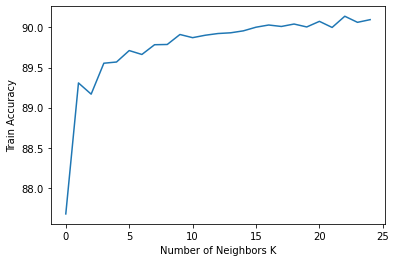

In [137]:
# To determine best k-value 
for k in neighbors:
    k_val = k+1
    knn_clf = KNeighborsClassifier(n_neighbors = k_val, weights='uniform', p=2, metric='euclidean')
    k_fold = model_selection.KFold(n_splits=10, random_state=123)
    cross_val_scores = model_selection.cross_val_score(knn_clf, X_train_reduced, y_train, cv=k_fold, scoring='accuracy')
    cv_scores.append(cross_val_scores.mean()*100)
    print("k=%d %0.2f (+/- %0.2f)" % (k_val, cross_val_scores.mean()*100, cross_val_scores.std()*100))

optimal_kval = neighbors[cv_scores.index(max(cv_scores))]
print ("The optimal number of neighbors is %d with %0.1f%%" % (optimal_kval, cv_scores[optimal_kval]))

plt.plot(neighbors, cv_scores)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Train Accuracy')
plt.show()

In [138]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=24)
knn.fit(X_train_reduced, y_train)
knn_pred = knn.predict(X_test_reduced)

In [139]:
# for train data
from sklearn.metrics import classification_report
print(classification_report(y_train, knn.predict(X_train_reduced)))


              precision    recall  f1-score   support

           0       0.91      0.99      0.95     29218
           1       0.71      0.25      0.37      3713

    accuracy                           0.90     32931
   macro avg       0.81      0.62      0.66     32931
weighted avg       0.89      0.90      0.88     32931



In [140]:
# for test data
confusion_matrix(y_test, knn.predict(X_test_reduced))

array([[7249,   59],
       [ 875,   50]], dtype=int64)

In [141]:
print(classification_report(y_test, knn.predict(X_test_reduced)))

              precision    recall  f1-score   support

           0       0.89      0.99      0.94      7308
           1       0.46      0.05      0.10       925

    accuracy                           0.89      8233
   macro avg       0.68      0.52      0.52      8233
weighted avg       0.84      0.89      0.84      8233



In [142]:
knn_score_test = knn.score(X_test_reduced,y_test)
knn_score_test

0.88655411150249

### Linear SVM

In [143]:
from sklearn.svm import LinearSVC

svm = LinearSVC()
svm.fit(X_train_reduced,y_train)
svc_pred = svm.predict(X_test_reduced)


In [144]:
# for train set
from sklearn.metrics import classification_report
print(classification_report(y_train, svm.predict(X_train_reduced)))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95     29218
           1       0.67      0.31      0.42      3713

    accuracy                           0.90     32931
   macro avg       0.79      0.64      0.68     32931
weighted avg       0.89      0.90      0.89     32931



In [145]:
#for test set
from sklearn.metrics import classification_report
print(classification_report(y_test, svm.predict(X_test_reduced)))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      7308
           1       0.48      0.17      0.25       925

    accuracy                           0.89      8233
   macro avg       0.69      0.57      0.59      8233
weighted avg       0.86      0.89      0.86      8233



In [146]:
svm_score_train = svm.score(X_train_reduced,y_train)
svm_score_train

0.904588381767939

In [147]:
svm_score_test = svm.score(X_test_reduced,y_test)
svm_score_test

0.8860682618729503

### Decision Tree Classifier

In [148]:
d_tree = DecisionTreeClassifier(criterion='entropy', random_state=0) 
d_tree.fit(X_train_reduced, y_train)
d_tree_pred = d_tree.predict(X_test_reduced)

In [149]:
print(classification_report(y_test, d_tree.predict(X_test_reduced)))

              precision    recall  f1-score   support

           0       0.91      0.88      0.89      7308
           1       0.23      0.28      0.26       925

    accuracy                           0.81      8233
   macro avg       0.57      0.58      0.57      8233
weighted avg       0.83      0.81      0.82      8233



In [150]:
print(classification_report(y_train, d_tree.predict(X_train_reduced)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     29218
           1       1.00      1.00      1.00      3713

    accuracy                           1.00     32931
   macro avg       1.00      1.00      1.00     32931
weighted avg       1.00      1.00      1.00     32931



In [151]:
d_tree_score_train = d_tree.score(X_train_reduced,y_train)
d_tree_score_train

0.9999696334760559

In [152]:
d_tree_score_test = d_tree.score(X_test_reduced,y_test)
d_tree_score_test

0.814283979108466

### Kernalized SVM(linear, rbf, poly)

In [153]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

tuned_parameters = [{'kernel': ['rbf'], 'gamma': [0.1],
                     'C': [1]},
                    {'kernel': ['linear'], 'C': [1]},
                   {'kernel' : ['poly'], 'degree':[3], 'C':[10] }]

In [154]:
clf = GridSearchCV(SVC(), tuned_parameters, cv=5, scoring='precision')
clf.fit(X_train, y_train)

print(clf.cv_results_)

{'mean_fit_time': array([91.10583048, 70.27198591, 80.00121274]), 'std_fit_time': array([1.04248985, 7.38563372, 1.80327034]), 'mean_score_time': array([5.95953856, 2.66312752, 2.90309567]), 'std_score_time': array([0.01897421, 0.03878049, 0.03692636]), 'param_C': masked_array(data=[1, 1, 10],
             mask=[False, False, False],
       fill_value='?',
            dtype=object), 'param_gamma': masked_array(data=[0.1, --, --],
             mask=[False,  True,  True],
       fill_value='?',
            dtype=object), 'param_kernel': masked_array(data=['rbf', 'linear', 'poly'],
             mask=[False, False, False],
       fill_value='?',
            dtype=object), 'param_degree': masked_array(data=[--, --, 3],
             mask=[ True,  True, False],
       fill_value='?',
            dtype=object), 'params': [{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}, {'C': 1, 'kernel': 'linear'}, {'C': 10, 'degree': 3, 'kernel': 'poly'}], 'split0_test_score': array([0.67412141, 0.63099631, 0.604081

In [155]:
print('The best model is: ', clf.best_params_)
print('This model produces a mean cross-validated score (precision) of', clf.best_score_)

The best model is:  {'C': 1, 'kernel': 'linear'}
This model produces a mean cross-validated score (precision) of 0.6362682830306745


In [156]:
svm_ker_lin = SVC(kernel='linear', C=1)
svm_ker_rbf = SVC(kernel='rbf', gamma=0.1, C=1)
svm_ker_poly = SVC(kernel='poly', degree=3, C=10)

In [157]:
svm_ker_lin.fit(X_train_reduced, y_train)
svm_ker_rbf.fit(X_train_reduced, y_train)
svm_ker_poly.fit(X_train_reduced, y_train)

ker_lin_pred = svm.predict(X_test_reduced)
ker_rbf_pred = svm.predict(X_test_reduced)
ker_poly_pred = svm.predict(X_test_reduced)

In [158]:
print(classification_report(y_train, svm_ker_lin.predict(X_train_reduced)))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95     29218
           1       0.65      0.29      0.41      3713

    accuracy                           0.90     32931
   macro avg       0.79      0.64      0.68     32931
weighted avg       0.89      0.90      0.89     32931



In [159]:
print(classification_report(y_train, svm_ker_rbf.predict(X_train_reduced)))

              precision    recall  f1-score   support

           0       0.94      0.99      0.97     29218
           1       0.89      0.52      0.66      3713

    accuracy                           0.94     32931
   macro avg       0.92      0.76      0.81     32931
weighted avg       0.94      0.94      0.93     32931



In [160]:
print(classification_report(y_train, svm_ker_poly.predict(X_train_reduced)))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96     29218
           1       0.80      0.50      0.62      3713

    accuracy                           0.93     32931
   macro avg       0.87      0.74      0.79     32931
weighted avg       0.92      0.93      0.92     32931



In [161]:
print(classification_report(y_test, svm_ker_poly.predict(X_test_reduced)))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91      7308
           1       0.30      0.32      0.31       925

    accuracy                           0.84      8233
   macro avg       0.61      0.61      0.61      8233
weighted avg       0.84      0.84      0.84      8233



In [162]:
print(classification_report(y_test, svm_ker_lin.predict(X_test_reduced)))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      7308
           1       0.53      0.15      0.24       925

    accuracy                           0.89      8233
   macro avg       0.72      0.57      0.59      8233
weighted avg       0.86      0.89      0.86      8233



In [163]:
print(classification_report(y_test, svm_ker_rbf.predict(X_test_reduced)))

              precision    recall  f1-score   support

           0       0.89      0.99      0.94      7308
           1       0.31      0.02      0.04       925

    accuracy                           0.88      8233
   macro avg       0.60      0.51      0.49      8233
weighted avg       0.82      0.88      0.84      8233



In [164]:
# Since linear kernel is our best model, we will consider it's train and test scores.
#test score
svm_ker_lin_score_test = svm_ker_lin.score(X_test_reduced,y_test)
svm_ker_lin_score_test

0.8895906716871128

In [165]:
#train score
svm_ker_lin_score_train = svm_ker_lin.score(X_train_reduced,y_train)
svm_ker_lin_score_train

0.9028574899031307

#### Results from Project 1 for all models :

##### Train scores for our models are as follows :

##### Logistric Regression :  0.9092951929792596
##### KNN Classification :  0.9031915216665148
##### Linear SVM :  0.9085056633567156
##### Kernalized SVM  :  0.8997904709847864
##### Decision Tree Classifier :  0.9999696334760559

##### Test scores for our models are as follows :

##### Logistric Regression :  0.9086602696465444
##### KNN Classification :  0.9001579011296004
##### Linear SVM :  0.9069597959431556
##### Kernalized SVM  :  0.9086602696465444
##### Decision Tree Classifier :  0.8933560063160452

###### As we can see from our train and test scores from Project 1 and our train and test scores when using our PCA reduced dataset, the scores have dropped. Hence, we can say that the dimensionally reduced dataset results in a poorer score compared to the original dataset. Although, PCA did help in saving computational time by reducing the features to 29 from 38.

In [100]:
import numpy
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV


Using TensorFlow backend.


In [101]:
def create_model():
    #create model
    model = Sequential()
    model.add(Dense(42, input_dim=38, activation='relu'))
    model.add(Dense(11, activation='relu'))
    model.add(Dense(3, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    #compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [102]:
seed = 10
np.random.seed(10)

In [103]:
model = KerasClassifier(build_fn = create_model, verbose = 0)

param_grid = {'batch_size':[10,20,25,30,35,40] , 'epochs':[10, 50,60,70, 100]}
grid_search = GridSearchCV(estimator= model, param_grid = param_grid, cv = 10)

In [ ]:
gird_search_result = grid_search.fit(X_train, y_train)


In [ ]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

In [ ]:
# create model
model = Sequential()

model.add(Dense(42, input_dim=38, activation='relu'))
model.add(Dense(11, activation='relu'))
model.add(Dense(3, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# Fit the model
model.fit(X_train, y_train, epochs=50, batch_size=30)

In [ ]:
y_predict = model.predict(X_test)
y_predict 